# Analysis on 2D Heisenberg model

In [1]:
import multiprocessing
import sys
import os
from pathlib import Path
from time import time
from typing import Tuple
from socket import gethostname

import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
from cycler import cycler
from tqdm.notebook import tqdm

# set plot customisation
plt.rc('font',**{'family':'serif',
             'serif': 'cmr10',
             'size': 12})
plt.rc('mathtext',**{'fontset':'cm'})
plt.rc('axes', unicode_minus=False, linewidth=1.2, xmargin=0,
           prop_cycle=cycler('color', ['#008fd5',
          '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']))
plt.rc('legend', loc='best', frameon=False)

from heisenberg_2d import initialize, metropolis, energy, magnetization, run_simulation

## Run the routine

In [2]:
# Settings

n_temp = 50
data_path = './results'
snaps = []

N = 8
H = np.array([1., 0., 0.])
steps = 4000
temp = np.linspace(0.3, 10.5, n_temp)

In [3]:
*results, wall_time = run_simulation(N, H, steps, temp)
results = np.array(results).T

Using 80 threads on brute



Took 29.062976837158203 s


### Save results

In [4]:
# mkdir in case
if not os.path.exists(data_path):
    os.makedirs(data_path)

# gather results in a table just in case
df = pd.DataFrame(results, columns=['E', 'M', 'C', 'X'])
df['temp'] = temp
for name, var in zip(['n_temp', 'N', 'steps', 'H', 'wall_time'], [n_temp, N, steps, [H] * n_temp, wall_time]):
    df[name] = var
    
# save the table
df.to_csv(f'{data_path}/data_{n_temp}_{N}_{steps}_{H}.csv', sep=',', header=True, index=False)
display(df)

,E,M,C,X,temp,n_temp,N,steps,H,wall_time
0,-0.461956,0.454991,0.083390,0.112679,0.300000,50,8,4000,"[1.0, 0.0, 0.0]",29.062977
1,-0.554772,0.332433,0.015952,0.009845,0.508163,50,8,4000,"[1.0, 0.0, 0.0]",29.062977
2,-0.640306,0.665759,0.005976,0.057747,0.716327,50,8,4000,"[1.0, 0.0, 0.0]",29.062977
3,-0.676694,0.722567,0.012811,0.215213,0.924490,50,8,4000,"[1.0, 0.0, 0.0]",29.062977
4,-0.671501,0.768618,0.023780,0.240520,1.132653,50,8,4000,"[1.0, 0.0, 0.0]",29.062977
5,-0.621469,0.798983,0.033136,0.710349,1.340816,50,8,4000,"[1.0, 0.0, 0.0]",29.062977
6,-0.555680,0.776257,0.075523,0.590972,1.548980,50,8,4000,"[1.0, 0.0, 0.0]",29.062977
7,-0.467643,0.676304,0.076215,0.780220,1.757143,50,8,4000,"[1.0, 0.0, 0.0]",29.062977
8,-0.377783,0.556637,0.078753,0.765149,1.965306,50,8,4000,"[1.0, 0.0, 0.0]",29.062977
9,-0.300621,0.459767,0.073263,0.858204,2.173469,50,8,4000,"[1.0, 0.0, 0.0]",29.062977


# Show all results

In [5]:
data_path = './results'

dfs = [pd.read_csv(f) for f in Path.cwd().rglob(f'{data_path}/*.csv')]
df = pd.concat(dfs, axis=0, join='inner').sort_index()

In [6]:
df

,E,M,C,X,temp,n_temp,N,steps,H,wall_time
0,-0.347225,0.428361,0.018497,0.023487,0.2,400,8,4000,[0. 0.5 0.86],29.804278
0,-0.338853,-0.009411,0.077152,0.018227,0.2,400,32,4000,[0. 0. 0.],168.243150
0,-0.461956,0.454991,0.083390,0.112679,0.3,50,8,4000,[1. 0. 0.],29.062977
0,-0.337329,0.046806,0.369803,0.025561,0.2,400,48,4000,[0. 0. 0.],349.060122
0,-0.422916,0.833259,0.228027,0.135707,0.2,400,32,4000,[1. 1. 1.],149.793159
...,...,...,...,...,...,...,...,...,...,...
399,-0.022922,-0.000188,0.000762,0.111231,10.0,400,64,4000,[0. 0. 0.],642.462919
399,-0.031726,0.042240,0.000945,0.114251,10.0,400,8,4000,[1. 0. 0.],29.034243
399,-0.031068,0.041313,0.000970,0.117823,10.0,400,80,4000,[1. 0. 0.],1142.393397
399,-0.023028,0.001961,0.000798,0.118282,10.0,400,48,4000,[0. 0. 0.],349.060122


## Plotting

Example of plotting all simulation data with a specific size $N$

In [7]:
# Uppermost for-loop is different external fields H
Hs = df['H'].unique()
figure_size = (6, 4)
figure_dir = './figures'

# mkdir in case
if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)

### Energy

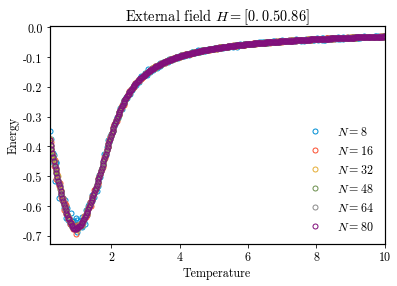

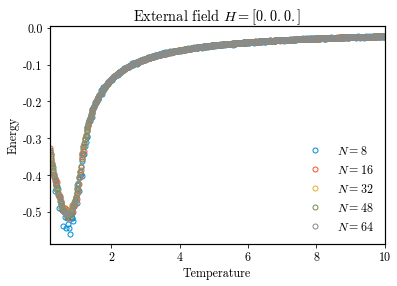

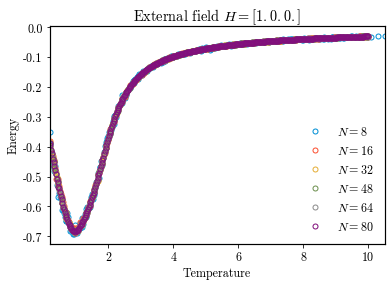

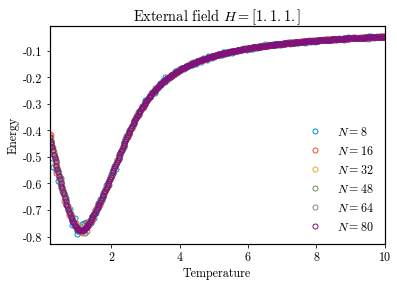

In [8]:
for H in Hs:
    
    # Select correct data
    dfh = df[(df['H'] == H)]
    
    plt.figure(figsize=figure_size)
    for N in sorted(dfh['N'].unique()):
        dfhn = dfh[dfh['N'] == N]
        E, M, C, X, temp, *_ = dfhn.values.T
        
        plt.title('External field $H={}$'.format(H))
        plt.plot(temp, E, 'o' , markersize=5, markerfacecolor="None", label=f'$N={N}$')
        plt.xlabel('Temperature'); plt.ylabel('Energy');
    plt.legend()
    plt.savefig(f'{figure_dir}/energy_{H}.pdf')
    plt.show()
    

###  Magnetisation

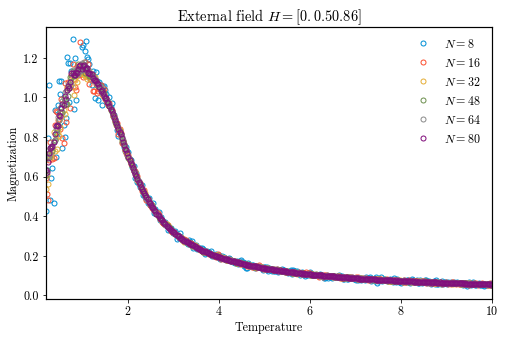

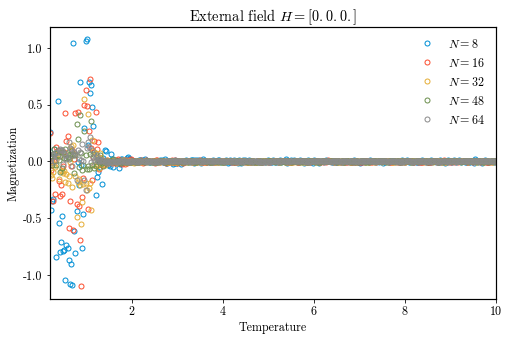

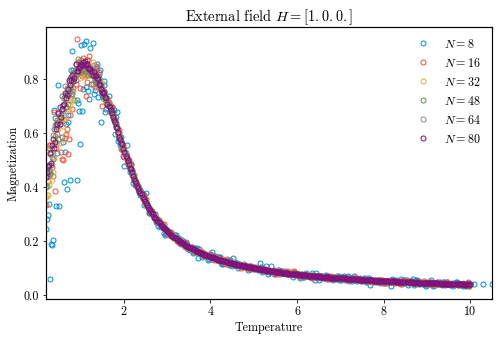

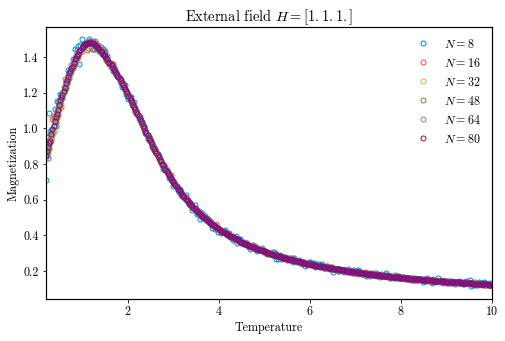

In [9]:
for H in Hs:
    
    # Select correct data
    dfh = df[(df['H'] == H)]
    
    plt.figure(figsize=(8,5))
    for N in sorted(dfh['N'].unique()):
        dfhn = dfh[dfh['N'] == N]
        E, M, C, X, temp, *_ = dfhn.values.T
        
        plt.title('External field $H={}$'.format(H))
        plt.plot(temp, M, 'o' , markersize=5, markerfacecolor="None", label=f'$N={N}$')
        plt.xlabel('Temperature'); plt.ylabel('Magnetization');
    plt.legend()
    plt.savefig(f'{figure_dir}/magnetisation_{H}.pdf')
    plt.show()
    

###  Specific Heat

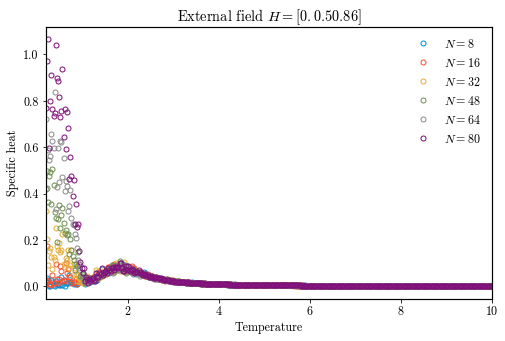

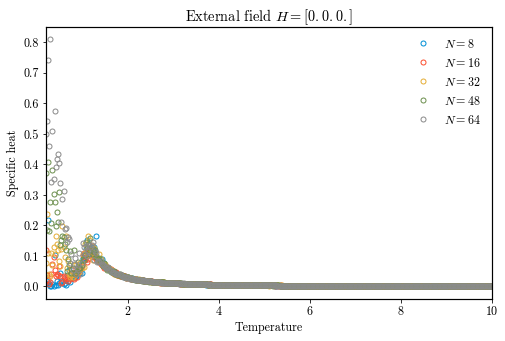

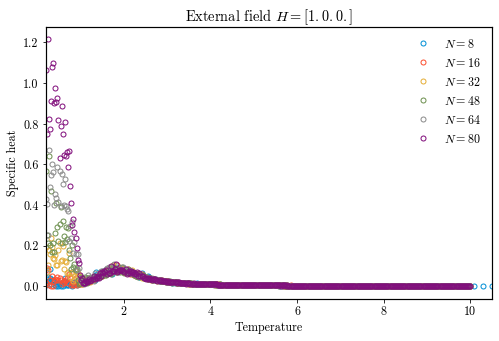

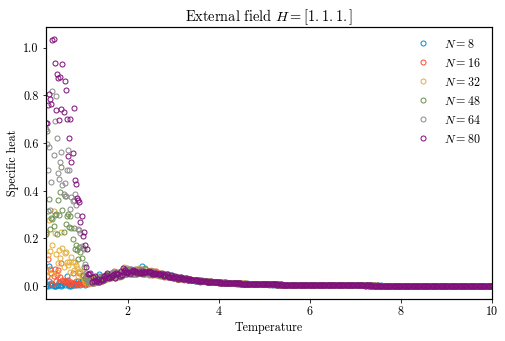

In [10]:
for H in Hs:
    
    # Select correct data
    dfh = df[(df['H'] == H)]
    
    plt.figure(figsize=(8,5))
    for N in sorted(dfh['N'].unique()):
        dfhn = dfh[dfh['N'] == N]
        E, M, C, X, temp, *_ = dfhn.values.T
        
        plt.title('External field $H={}$'.format(H))
        plt.plot(temp, C, 'o' , markersize=5, markerfacecolor="None", label=f'$N={N}$')
        plt.xlabel('Temperature'); plt.ylabel('Specific heat');
    plt.legend()
    plt.savefig(f'{figure_dir}/cv_{H}.pdf')
    plt.show()
    

###  Susceptibility

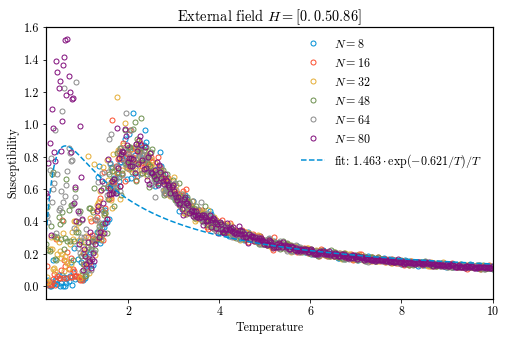

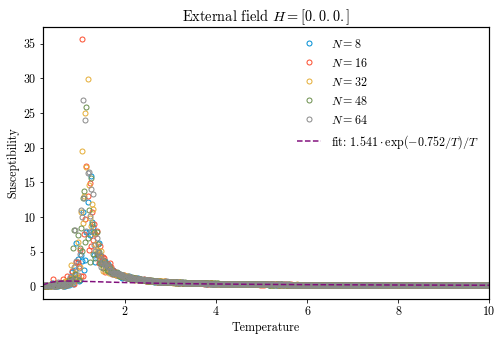

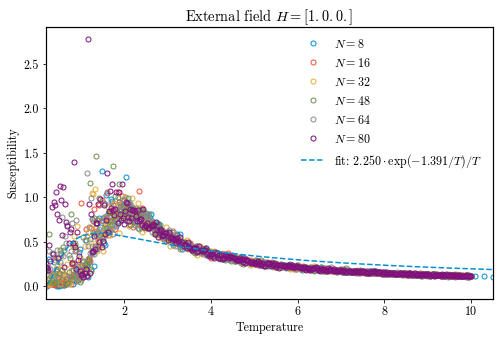

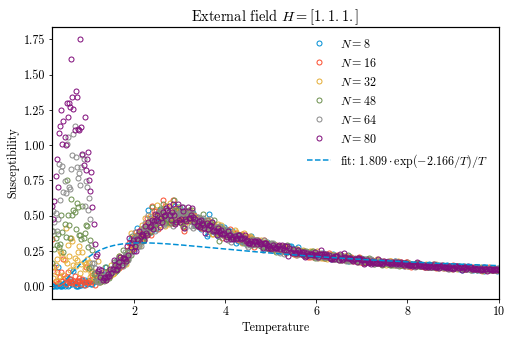

In [11]:
def power_law(T, a, b):
    return a * np.exp( b / T) / T  #np.power(x, 3./2.)  # TODO what?

for H in Hs:
    
    # Select correct data
    dfh = df[(df['H'] == H)]
    
    plt.figure(figsize=(8,5))
    for N in sorted(dfh['N'].unique()):
        dfhn = dfh[dfh['N'] == N]
        E, M, C, X, temp, *_ = dfhn.values.T
        
        plt.title('External field $H={}$'.format(H))
        plt.plot(temp, X, 'o' , markersize=5, markerfacecolor="None", label=f'$N={N}$')
        plt.xlabel('Temperature'); plt.ylabel('Susceptibility');
    
    # fit power law with all data
    temp = dfh['temp'].sort_values()
    error = dfh.pivot_table(values=['X'], index='temp', aggfunc=np.std).values[:,-1] ** (0.70)
    error = np.repeat(error, len(dfh['N'].unique()))
#     temp = error.index.values
#     error = error.values[:,-1]
#     x = dfh.pivot_table(values=['X'], index='temp', aggfunc=np.mean).values[:,-1]
#     print(temp.shape, x.shape, error.shape)
    
    try:
        popt, pcov = scipy.optimize.curve_fit(power_law, dfh['temp'], dfh['X'], sigma=error, absolute_sigma=True)
    except ValueError as e:
        popt, pcov = scipy.optimize.curve_fit(power_law, dfh['temp'], dfh['X'])
    plt.plot(temp, power_law(temp, *popt), '--', label=f'fit: ${popt[0]:.3f}\\cdot\\exp({popt[1]:.3f}/T)/T$')
    
    plt.legend()
    plt.savefig(f'{figure_dir}/susceptibility_{H}.pdf')
    plt.show()
    

### N vs. time figure
Gather all data and compare with $N$

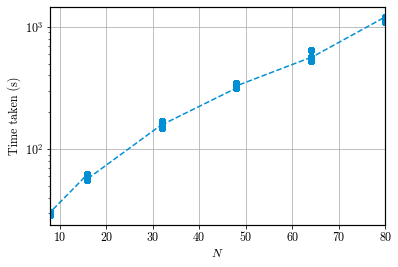

In [12]:
dfs = df.sort_values(by=['N'])
dfs['wall_time']

plt.figure(figsize=figure_size)
plt.semilogy(dfs['N'], dfs['wall_time'], 'o--')
plt.xlabel('$N$'); plt.ylabel('Time taken (s)')

plt.grid()
plt.savefig(f'{figure_dir}/NvsTime.pdf')
plt.show()